# Лабораторная работа №2

Выполнили:
* Меньшутин Алексей, M3436
* Каменев Юрий, M3436

In [1]:
import numpy as np
import tracemalloc
from time import time

Возьмём три функции:
* квадратичная:
    * $f(\tilde{x}) = 100(y - x) ^ 2 + (1 - x) ^ 2$
    * $\nabla f(\tilde{x}) = (202x - 200y - 2, 200(y - x))$
    * Гессиан = $((202, -200), (-200, 200))$
* функция Розенброка:
    * $f(\tilde{x}) = 100(y - x^2)^2 + (1 - x)^2 $
    * $\nabla f(\tilde{x}) = (2(200x^3 - 200xy + x - 1), 200(y - x^2))$
    * Гессиан = $((-400(y - x^2 + 800x^2 + 2, -400x), (-400x, 200))$
* тестовая функция:
    * $f(x, y) = 2e^{-(\frac{x - 1}{2})^2 - (\frac{y - 1}{1})^2} + 3e^{-(\frac{x - 2}{3})^2 - (\frac{y - 3}{2})^2} $
    * $\nabla f(\tilde{x}) = записать сюда$
    * Гессиан = $ записать сюда $

In [2]:
class Statistic:
    def __init__(self):
        self.__start_time = None
        self.iterations = 0
        self.spent_time = 0.0
        self.memory = 0
        self.function_calculations = 0
        self.gradient_calculations = 0
        self.hessian_calculations = 0
        self.is_tracing_running = False

    def start_clock(self):
        self.__start_time = time()

    def stop_clock(self):
        self.spent_time += time() - self.__start_time
        self.__start_time = None

    def start_trace(self):
        tracemalloc.start()
        self.is_tracing_running = True

    def stop_trace(self):
        if self.is_tracing_running:
            res = tracemalloc.take_snapshot()
            stats = res.statistics(cumulative=True, key_type='filename')
            for stat in stats:
                self.memory += stat.size
            tracemalloc.stop()
            self.is_tracing_running = False

    def print_stat(self):
        print('time:           ', self.spent_time)
        print('memory:         ', self.memory)
        print('function_calls: ', self.function_calculations)
        print('gradient_calls: ', self.gradient_calculations)
        print('hessian_calls:  ', self.hessian_calculations)
        print('iterations:     ', self.iterations)

In [3]:
def quad_function(x):
    return 100 * (x[1] - x[0]) ** 2 + (1 - x[0]) ** 2

def grad_quad_function(arg):
    x = arg[0]
    y = arg[1]
    dx = 202 * x - 200 * y - 2
    dy = 200 * (y - x)
    return np.array([dx, dy])

def hessian_quad_function(_):
    return np.array([np.array([202, -200]), np.array([-200, 200])])

def rosenbrock(x):
    return 100 * (x[1] - x[0] ** 2) ** 2 + (1 - x[0]) ** 2

def grad_rosenbrock(arg):
    x = arg[0]
    y = arg[1]
    dx = 2 * (200 * (x ** 3) - 200 * x * y + x - 1)
    dy = 200 * (y - (x ** 2))
    return np.array([dx, dy])

def hessian_rosenbrock(arg):
    x = arg[0]
    y = arg[1]
    return np.array([
        np.array([-400 * (y - x ** 2) + 800 * x ** 2 + 2, -400 * x]),
        np.array([-400 * x, 200])
    ])

def test_function(arg):
    x = arg[0]
    y = arg[1]
    return  2 * np.exp(-((x - 1) / 2) ** 2 - ((y - 1) / 1) ** 2) + 3 * np.exp(-((x - 2) / 3) ** 2 - ((y - 3) / 2) ** 2)

def reversed_f(arg):
    x = arg[0]
    y = arg[1]
    return  -1 * (2 * np.exp(-((x - 1) / 2) ** 2 - ((y - 1) / 1) ** 2) + 3 * np.exp(-((x - 2) / 3) ** 2 - ((y - 3) / 2) ** 2))


def grad_test_function(arg):
    x = arg[0]
    y = arg[1]
    dx = -2 / 3 * (x - 2) * np.exp(-1 / 9 * (x - 2) ** 2 - 1 / 4 * (y - 3) ** 2) - (x - 1) * np.exp(-1 / 4 * (x - 1) ** 2 - (y - 1) ** 2)
    dy = -3 / 2 * (y - 3) * np.exp(-1 / 9 * (x - 2) ** 2 - 1 / 4 * (y - 3) ** 2) - 4 * (y - 1) * np.exp(-1 / 4 * (x - 1) ** 2 - (y - 1) ** 2)
    return (-1) * np.array([dx, dy])

def hessian_test_function(arg):
    x = arg[0]
    y = arg[1]
    dx_2 = 1 / 2 * (1 - x) ** 2 * np.exp(-1/4 * (x - 1) ** 2 - (y - 1) ** 2) - 2/3 * np.exp(-1/9 * (x - 2) ** 2 - 1/4 * (y - 3) ** 2) - np.exp(-1/4 * (x - 1) ** 2 - (y - 1) ** 2) + 4/27 * (x - 2) ** 2 * np.exp(-1 / 9 * (x - 2) ** 2 - 1 / 4 * (y - 3) ** 2)
    dxdy = -1 / 3 * (x - 2) * (3 - y) * np.exp(-1 / 9 * (x - 2) ** 2 - 1/ 4 * (y - 3) ** 2) - 2 * (1 - x) * (y - 1) * np.exp(-1 / 4 * (x - 1) ** 2 - (y - 1) ** 2)
    dydx = dxdy
    dy_2 = 3 / 4 * (3 - y) ** 2 * np.exp(-1 / 9 * (x - 2) ** 2 - 1 / 4* (y - 3) ** 2) - 3 / 2 * np.exp(-1/9 * (x - 2) ** 2 - 1/4 * (y - 3) ** 2) - 4 * np.exp(-1/4 * (x -1) ** 2 - (y - 1) ** 2) + 8 * (y - 1) ** 2 * np.exp(-1/4 * (x - 1) ** 2 - (y - 1) ** 2)
    return (-1) * np.array([
        np.array([dx_2, dxdy]),
        np.array([dydx, dy_2])
    ])

In [4]:
def golden_ratio(function, left_border, right_border, x, p, stat, eps=1e-8):
    phi = (1 + np.sqrt(5)) / 2
    a = left_border
    b = right_border
    iterations = 0
    calculations = 0
    segments = [(a, b)]

    c_1 = b - (b - a) / phi
    c_2 = a + (b - a) / phi

    stat.function_calculations += 2
    calc_result = [function(x + p * c_1), function(x + p * c_2)]
    calculations += 2

    while (b - a) / 2 >= eps:
        iterations += 1
        calculations += 1
        stat.function_calculations += 1
        if calc_result[0] > calc_result[1]:
            a = c_1
            c_1 = c_2
            c_2 = b - (c_1 - a)
            calc_result[0] = calc_result[1]
            calc_result[1] = function(x + p * c_2)
        else:
            b = c_2
            c_2 = c_1
            c_1 = a + b - c_2
            calc_result[1] = calc_result[0]
            calc_result[0] = function(x + p * c_1)
        segments.append((a, b))

    c = (b + a) / 2

    return c



## Метод сопряжённых направлений

Метод Флетчера-Ривса

In [5]:
def print_result(x, f, stat):
    print('x: ', x)
    print('y: ', f(x))
    stat.print_stat()

In [13]:

def method_Fletcher_Reeves(f, f_grad, _,  start_point, eps = 1e-8):
    prev_x = [float('inf')] * 2
    cur_x = start_point

    stat = Statistic()
    stat.start_clock()
    stat.start_trace()

    stat.gradient_calculations += 1
    cur_grad = f_grad(cur_x)
    p = -cur_grad

    xs = []
    iterations = 0
    while stat.iterations < 100 and np.linalg.norm(cur_x - prev_x) > eps:
        xs.append(cur_x)
        stat.iterations += 1
        alpha = golden_ratio(f, 0, 5, cur_x, p, stat)
        prev_x = cur_x
        prev_grad = cur_grad
        cur_x = cur_x + alpha * p
        cur_grad = f_grad(cur_x)
        stat.gradient_calculations += 1
        if iterations % 2 == 0:
            beta = 0.0
        else:
            beta = -cur_grad.dot(cur_grad) / prev_grad.dot(prev_grad)
        p = -cur_grad + beta * p
    stat.stop_trace()
    stat.stop_clock()
    xs.append(cur_x)
    return cur_x, stat, xs
method_Fletcher_Reeves(reversed_f, grad_test_function, hessian_test_function, np.zeros(2))


(array([1.263035  , 1.33439596]),
 [array([0., 0.]),
  array([0.35681963, 1.37392148]),
  array([1.12712939, 1.17386535]),
  array([1.16844554, 1.3329517 ]),
  array([1.24551746, 1.3129354 ]),
  array([1.25102154, 1.33412855]),
  array([1.26076405, 1.33159835]),
  array([1.26148127, 1.33435995]),
  array([1.26274054, 1.33403293]),
  array([1.26283361, 1.33439127]),
  array([1.26299682, 1.33434889]),
  array([1.2630089 , 1.33439533]),
  array([1.26303009, 1.33438986]),
  array([1.26303164, 1.33439587]),
  array([1.26303438, 1.33439518]),
  array([1.26303458, 1.33439593]),
  array([1.26303494, 1.33439588]),
  array([1.26303496, 1.33439595]),
  array([1.263035  , 1.33439596]),
  array([1.263035  , 1.33439596])])

## Метод Ньютона

Описание...

In [14]:
def positive_matrix(m):
    eigenvalues = np.linalg.eigvals(m)
    if all(eigenvalues > 0):
        return m
    else:
        return m + 2 * (-min(eigenvalues)) * np.eye(m.shape[0])

def newton(f, f_grad, f_hessian, start_point, eps = 1e-8):
    cur_x = start_point
    stat = Statistic()
    stat.start_trace()
    stat.start_clock()
    xs = []
    cur_grad = 1

    while stat.iterations < 100 and np.linalg.norm(cur_grad) > eps:
        xs.append(cur_x)
        stat.iterations += 1
        cur_hessian = f_hessian(cur_x)
        stat.hessian_calculations += 1
        pos_hessian = positive_matrix(cur_hessian)
        cur_grad = f_grad(cur_x)
        cur_x = cur_x - np.linalg.inv(pos_hessian) @ cur_grad
        stat.gradient_calculations += 1
    stat.stop_trace()
    stat.stop_clock()
    xs.append(cur_x)
    return cur_x, stat, xs

newton(test_function, grad_test_function, hessian_test_function, np.zeros(2))

(array([1.26303502, 1.33439596]),
 [array([0., 0.]),
  array([0.2578328 , 0.80606054]),
  array([2.30342694, 1.71425455]),
  array([1.54617322, 1.30531208]),
  array([1.24493281, 1.32884394]),
  array([1.26294846, 1.33431195]),
  array([1.26303502, 1.33439595]),
  array([1.26303502, 1.33439596]),
  array([1.26303502, 1.33439596])])

In [15]:
def gradient_descent(f, f_grad, _, start_point, eps = 1e-8):
    prev_x = [float('inf')] * 2
    cur_x = start_point
    stat = Statistic()
    stat.start_clock()
    stat.start_trace()
    xs = []
    while stat.iterations < 100 and np.linalg.norm(cur_x - prev_x) > eps:
        prev_x = cur_x
        xs.append(cur_x)
        cur_grad = -f_grad(cur_x)
        stat.iterations += 1
        stat.gradient_calculations += 1
        cur_grad = cur_grad / np.linalg.norm(cur_grad)
        alpha = golden_ratio(reversed_f, 0, 5, cur_x, cur_grad, stat)
        cur_x = cur_x + cur_grad * alpha
    stat.stop_trace()
    stat.stop_clock()
    xs.append(cur_x)
    return cur_x, stat, xs

gradient_descent(test_function, grad_test_function, hessian_test_function, np.zeros(2))

(array([1.96715135, 2.88611465]),
 [array([0., 0.]),
  array([0.79016001, 3.04248342]),
  array([1.90776168, 2.75223246]),
  array([1.94316529, 2.88855259]),
  array([1.96557395, 2.88273291]),
  array([1.96647017, 2.88618358]),
  array([1.96710631, 2.88601829]),
  array([1.96713192, 2.88611664]),
  array([1.96715023, 2.88611193]),
  array([1.96715087, 2.8861147 ]),
  array([1.96715135, 2.88611465]),
  array([1.96715135, 2.88611465])])

## Сравнение


In [22]:
all_functions = [
    [quad_function, grad_quad_function, hessian_quad_function, "Quad function"],
    [rosenbrock, grad_rosenbrock, hessian_rosenbrock, "Rosenbrock"],
    [reversed_f, grad_test_function, hessian_test_function, "Test function"]
]

start_points = [
    np.array([-4, -2]),
    np.array([3, -1]),
    np.array([0, 0]),
    np.array([3, 5]),
    np.array([-1, 5])
]

methods = [
    [method_Fletcher_Reeves, "Fletcher Reeves"],
    [newton, "Newton"],
    [gradient_descent, "gradient descent"]
]

results_for_graphs = []

for function in all_functions:
    for point in start_points:
        print("=================================================================================")
        print("Function name: " + function[-1])
        print()
        for method in methods:
            x, stat, xs = method[0](function[0], function[1], function[2], point)
            print("Method: " + method[1])
            print("Start point: ", point)
            print_result(x, function[0], stat)
            print()
            results_for_graphs.append((point, method[-1], function[-1], xs, function[0]))

        print()
        print()

Function name: Quad function

Method: Fletcher Reeves
Start point:  [-4 -2]
x:  [1. 1.]
y:  9.295613056989614e-18
time:            0.04900336265563965
memory:          3004
function_calls:  473
gradient_calls:  12
hessian_calls:   0
iterations:      11

Method: Newton
Start point:  [-4 -2]
x:  [1. 1.]
y:  0.0
time:            0.00099945068359375
memory:          584
function_calls:  0
gradient_calls:  2
hessian_calls:   2
iterations:      2

Method: gradient descent
Start point:  [-4 -2]
x:  [-3.99999381 -2.00000604]
y:  424.9950435242065
time:            1.3250062465667725
memory:          12901
function_calls:  4300
gradient_calls:  100
hessian_calls:   0
iterations:      100



Function name: Quad function

Method: Fletcher Reeves
Start point:  [ 3 -1]
x:  [0.99947948 0.9994775 ]
y:  2.713315480399821e-07
time:            0.3999979496002197
memory:          12436
function_calls:  4300
gradient_calls:  101
hessian_calls:   0
iterations:      100

Method: Newton
Start point:  [ 3 -1]


45

In [32]:
import matplotlib.pyplot as plt
from tqdm import tqdm

def draw_function(method_name, function, function_name, trace, show_trace_maker, x_min, x_max, x_step, y_min, y_max, y_step, levels):
    trace_to_show = show_trace_maker(trace)


    x_s = np.arange(x_min, x_max, x_step)
    y_s = np.arange(y_min, y_max, y_step)
    z_s = np.array([[function(np.array([x, y])) for x in x_s] for y in y_s])

    plt.figure()
    cs = plt.contour(x_s, y_s, z_s, levels=levels)
    for i in tqdm(range(len(trace_to_show) - 1)):
        cur_point = trace_to_show[i]
        next_point = trace_to_show[i + 1]
        plt.scatter([cur_point[0]], [cur_point[1]])
        plt.plot([cur_point[0], next_point[0]], [cur_point[1], next_point[1]])
    plt.grid()
    plt.title(method_name + ", " + function_name + ", start point: " + str(trace[0]))
    plt.show()



100%|██████████| 45/45 [15:37<00:00, 20.84s/it]


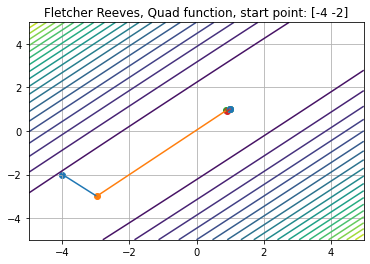

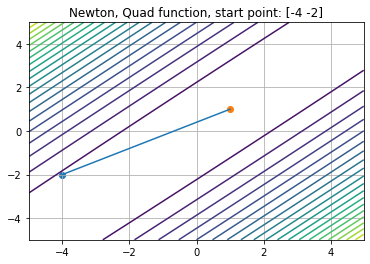

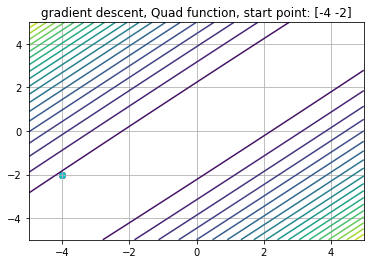

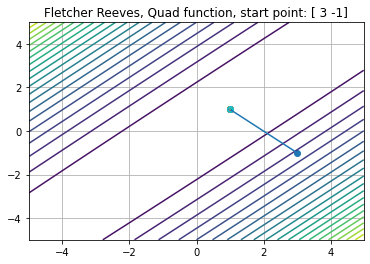

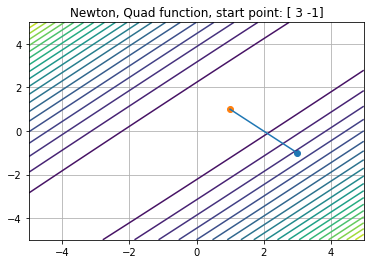

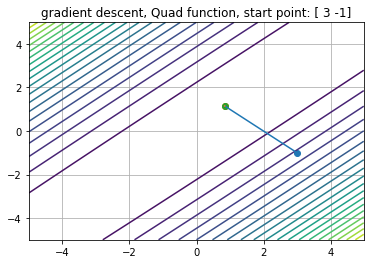

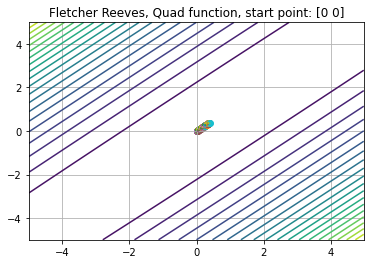

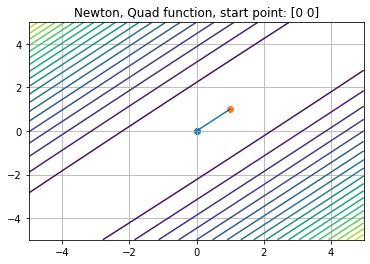

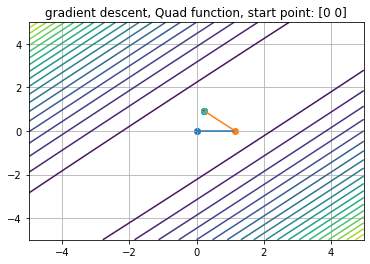

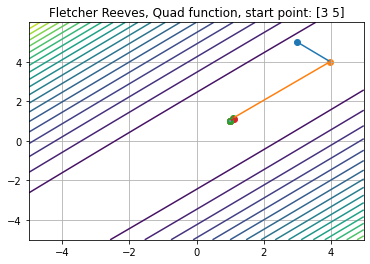

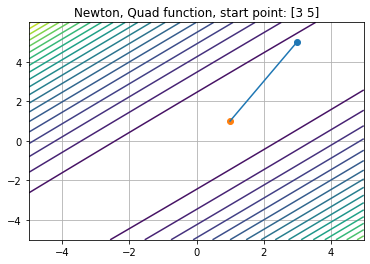

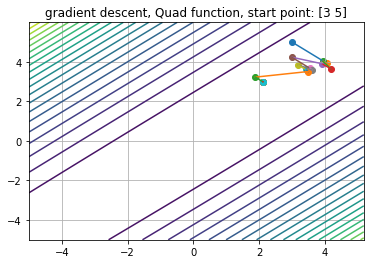

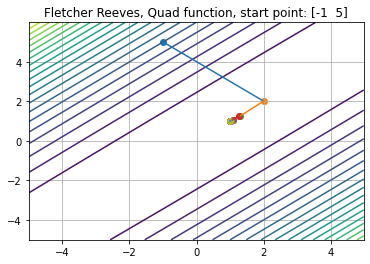

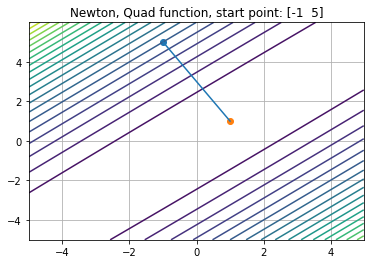

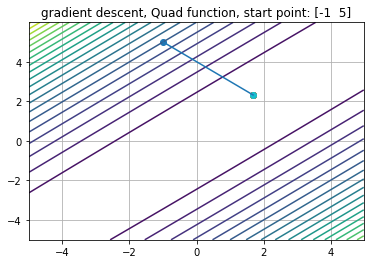

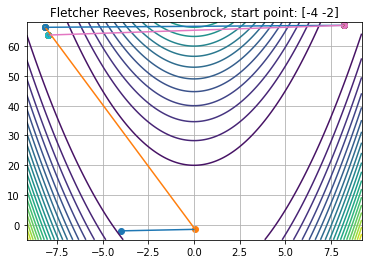

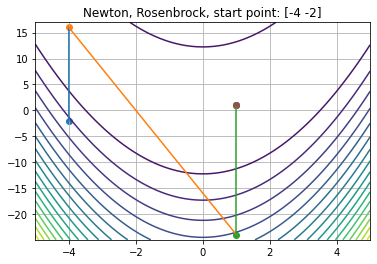

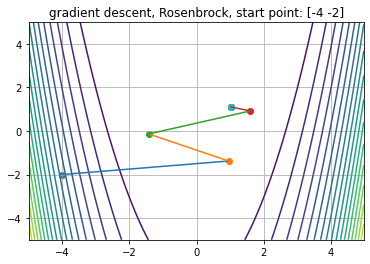

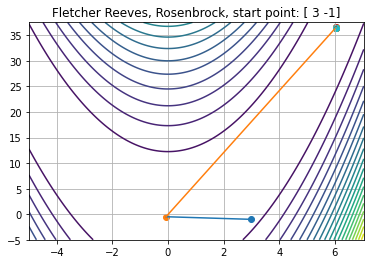

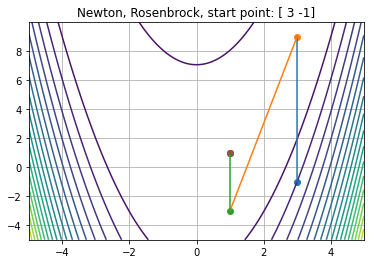

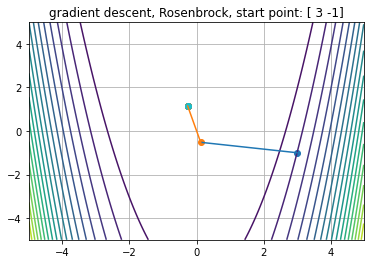

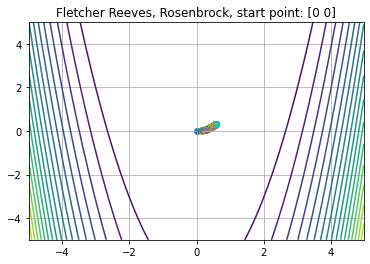

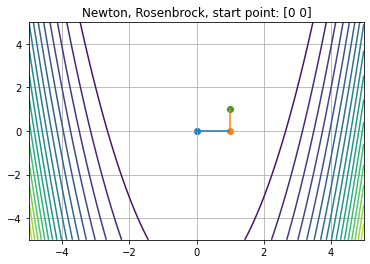

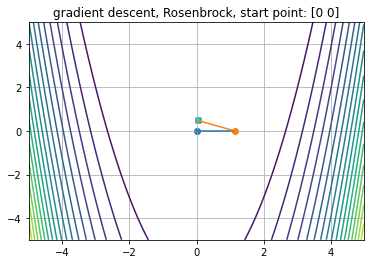

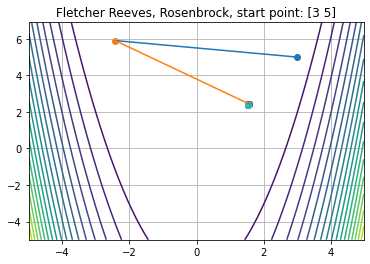

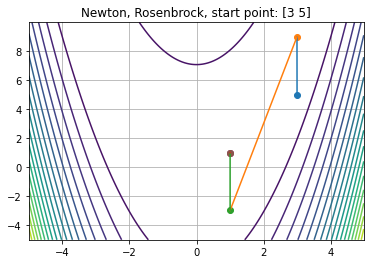

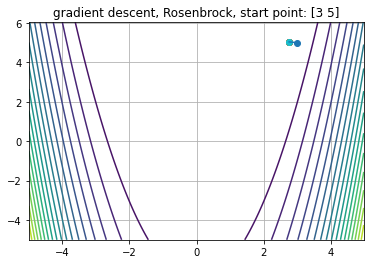

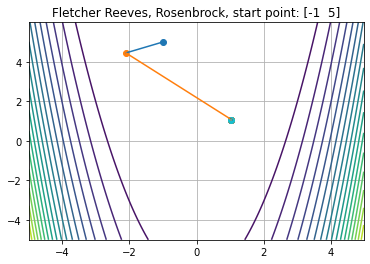

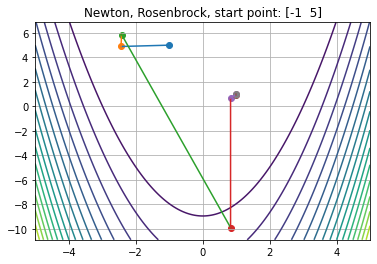

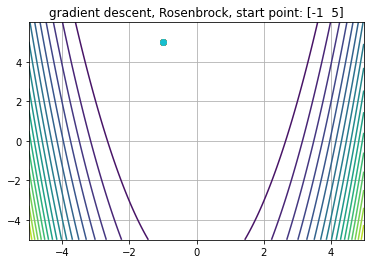

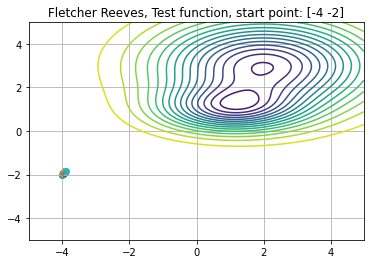

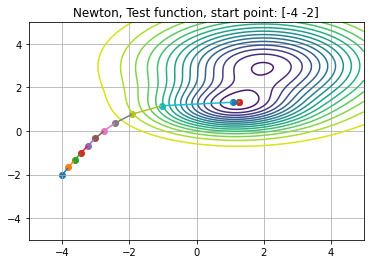

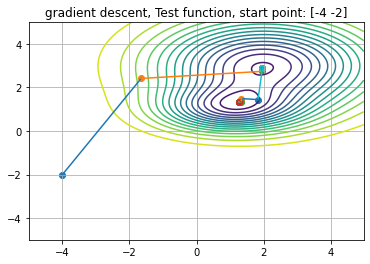

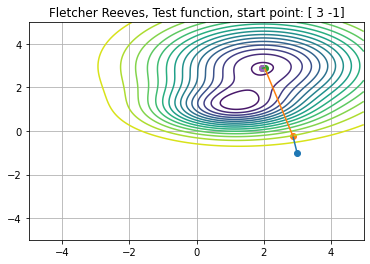

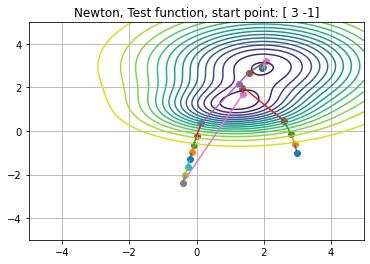

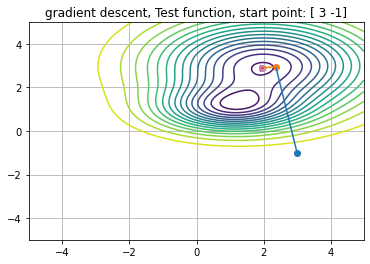

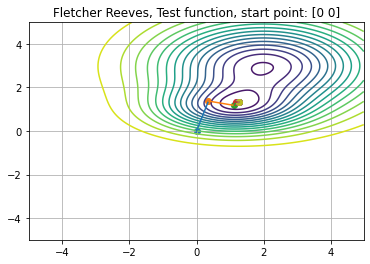

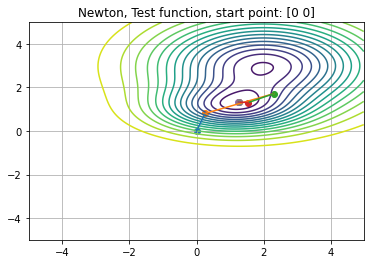

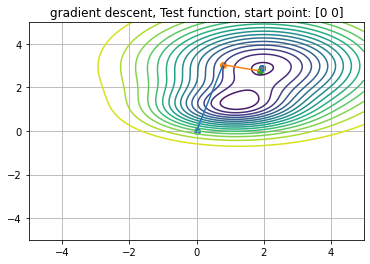

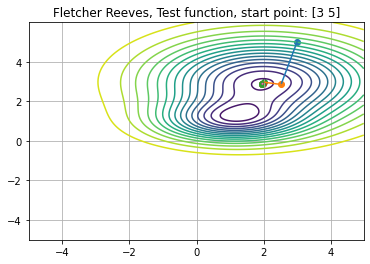

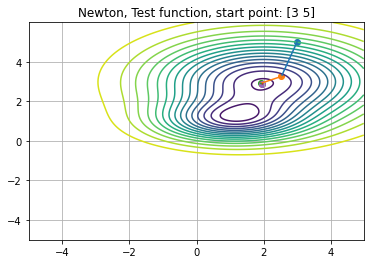

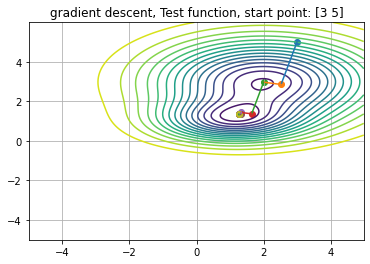

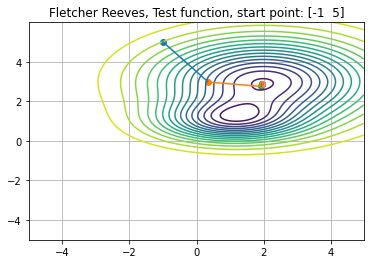

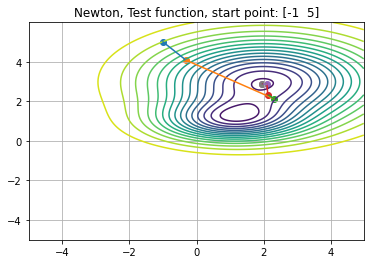

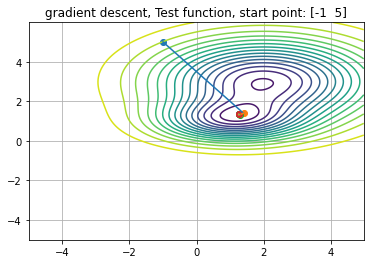

In [42]:
for result in tqdm(results_for_graphs):
    xs = list(map(lambda x: x[0], result[3]))
    ys = list(map(lambda y: y[1], result[3]))

    draw_function(
        result[1],
        result[-1],
        result[2],
        result[3],
        show_trace_maker=lambda trace: trace,
        x_min=min(-5, min(xs) - 1),
        x_max=max(5, max(xs) + 1),
        x_step=0.01,
        y_min=min(-5, min(ys) - 1),
        y_max=max(5, max(ys) + 1),
        y_step=0.01,
        levels=20,
    )